# Bike Sharing Case Study

#### Problem Statement:

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands


# Step 1: Reading and Understanding the Data

Let us first import libraries which will be used.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
bike_data=pd.read_csv('day.csv')

## Dropping the unwanted columns


In [3]:
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.
# atemp is giving the feels like value for temperature hence temp can be dropped.

bike_data.drop('instant',axis=1,inplace=True)
bike_data.drop('dteday',axis=1,inplace=True)
bike_data.drop('casual',axis=1,inplace=True)
bike_data.drop('registered',axis=1,inplace=True)
bike_data.drop('temp',axis=1,inplace=True)

## Check the null value and their data structures

In [4]:
null_count = bike_data.isnull().sum().sum()
print('Number of null values:', null_count)

Number of null values: 0


In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [6]:
bike_data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,42.044800,97.250000,34.000021,8714.000000


In [7]:
bike_data.shape

(730, 11)

In [8]:
# Replace season binary numbers into meaningful categories. 
bike_data['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)
bike_data['yr'].replace({0:'2018',1:'2019'},inplace=True)
bike_data.rename(columns={'mnth':'month'},inplace=True)
bike_data['month'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace=True)
bike_data['weekday'].replace({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'},inplace=True)
bike_data['holiday'].replace({0:'No Holiday',1:'Holiday'},inplace=True)
bike_data['workingday'].replace({0:'Holiday_w',1:'Working'},inplace=True)
bike_data['weathersit'].replace({1:'Clear',2:'Mist',3:'Light Rain',4:'Heavy Rain'},inplace=True)


# Step 2: EDA and Visualising Data

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

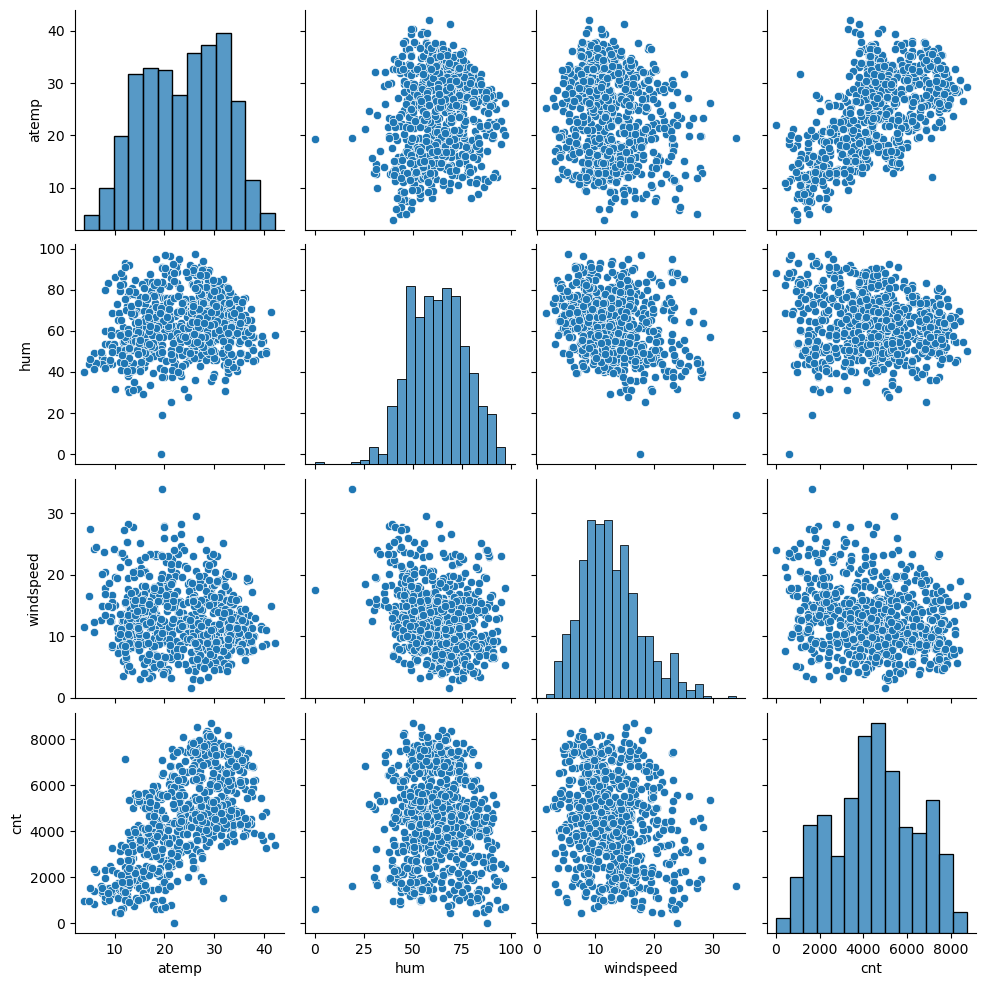

In [9]:
sns.pairplot(bike_data)


#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

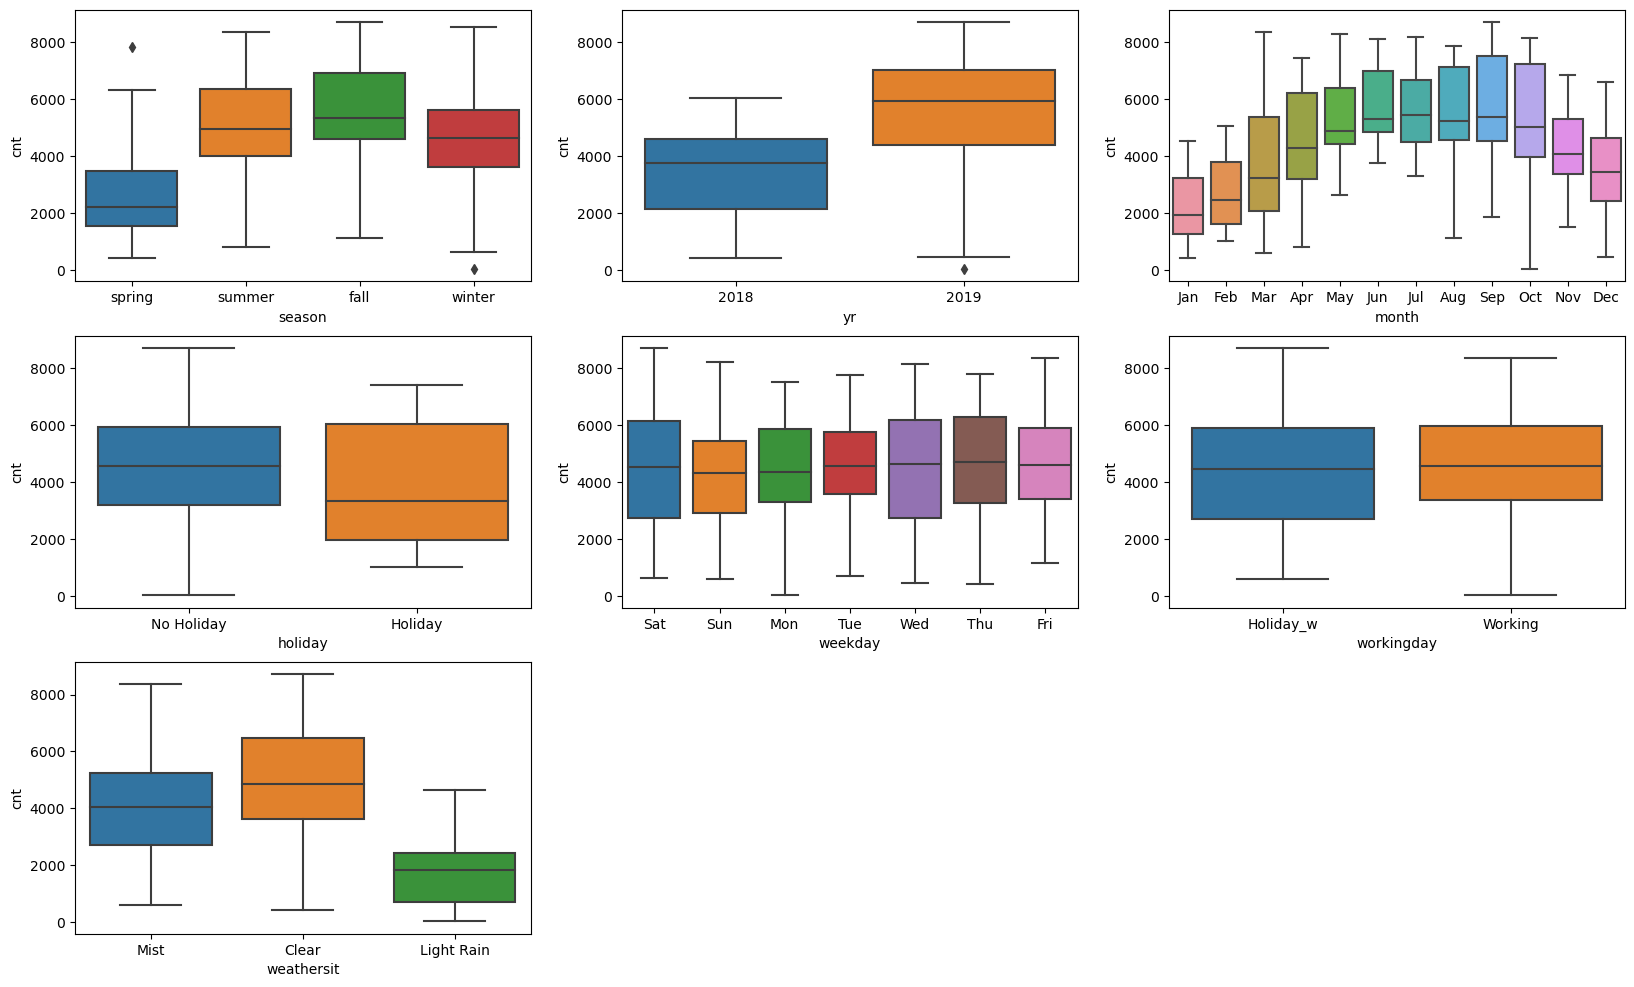

In [10]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'month', y = 'cnt', data = bike_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.show()

In [11]:
def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(bike_data,x=column,y='cnt')
    plt.subplot(1,2,2)
    sns.barplot(bike_data,x=column,y='cnt',hue='yr')
    plt.legend(labels=['2018', '2019'])
    plt.show()

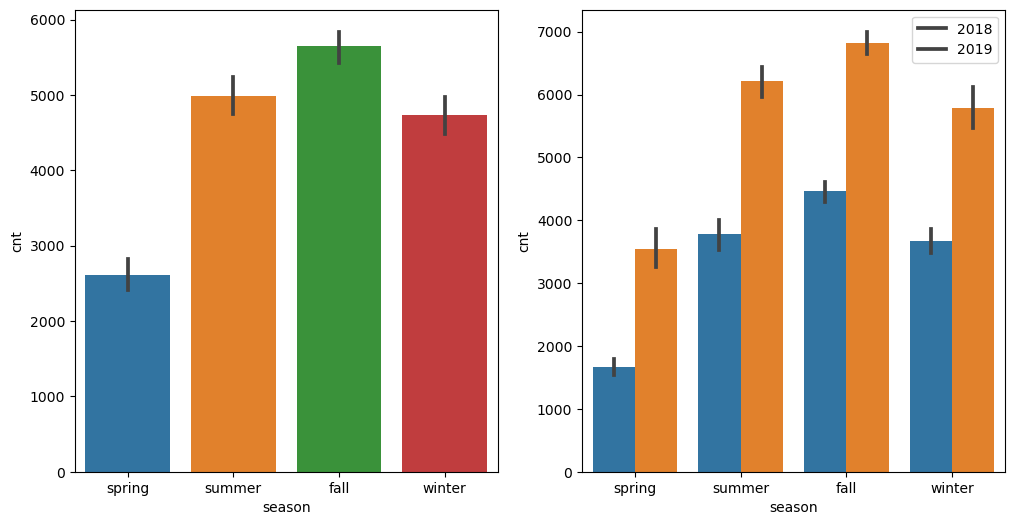

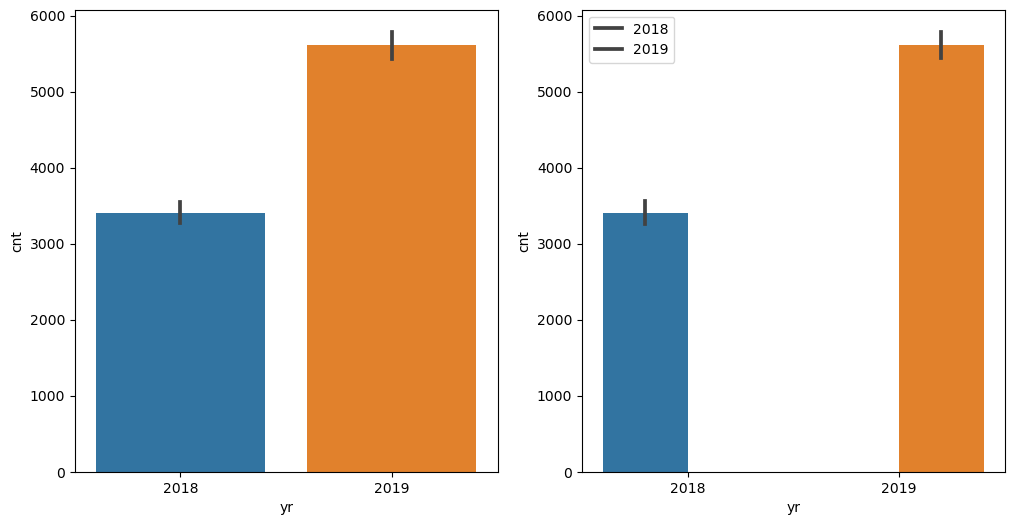

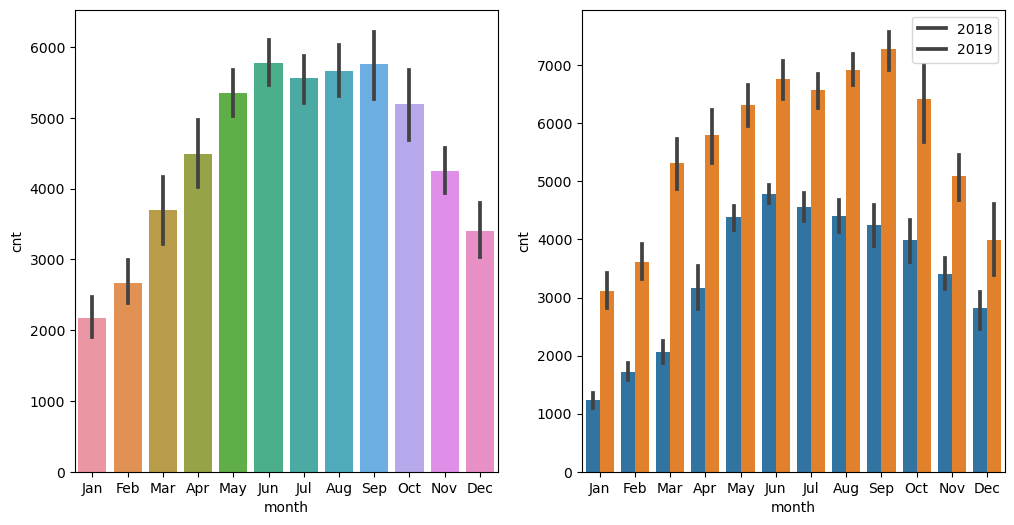

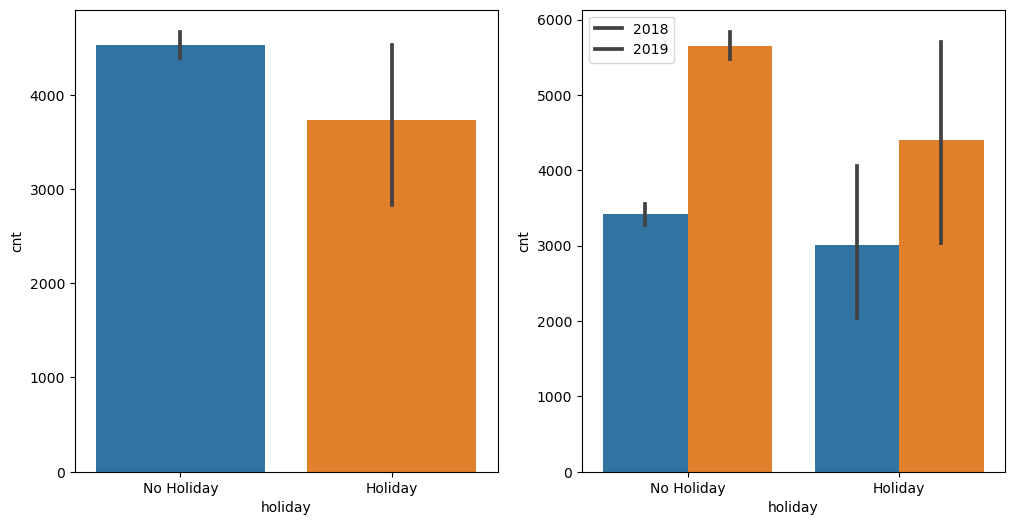

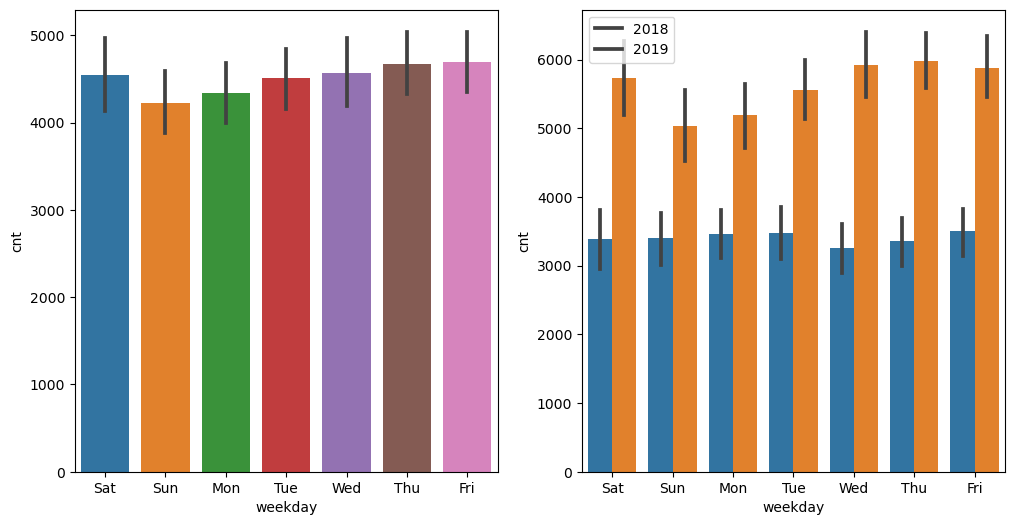

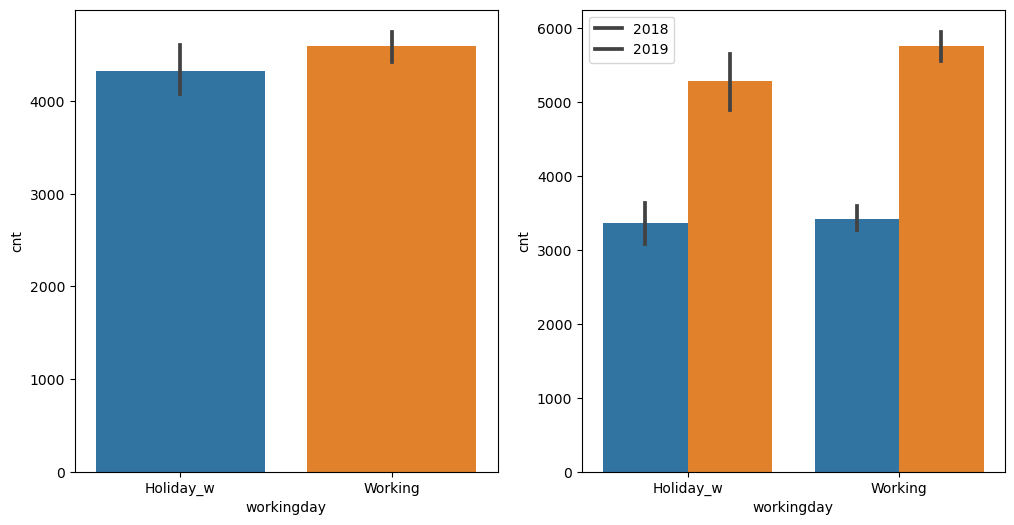

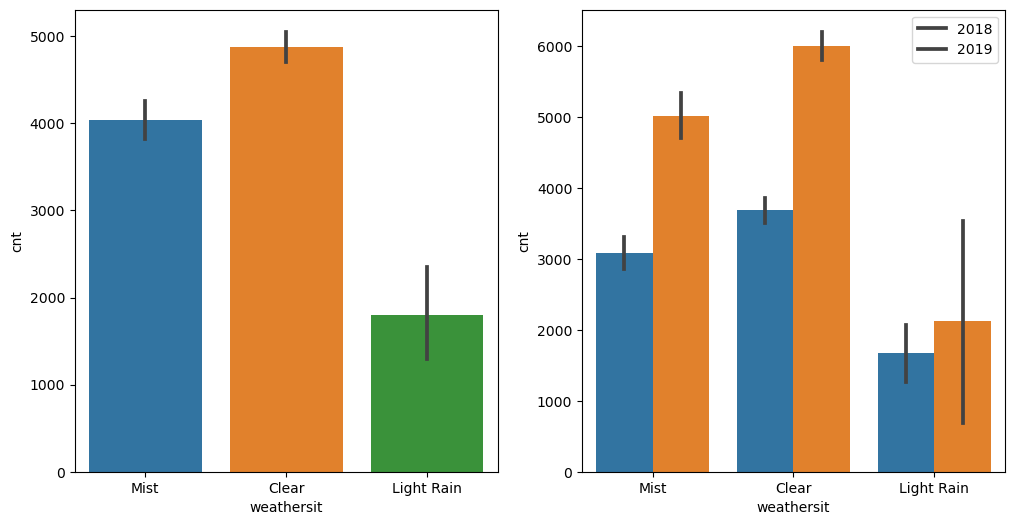

In [12]:
plot_cat_columns('season')
plot_cat_columns('yr')
plot_cat_columns('month')
plot_cat_columns('holiday')
plot_cat_columns('weekday')
plot_cat_columns('workingday')
plot_cat_columns('weathersit')

<Axes: >

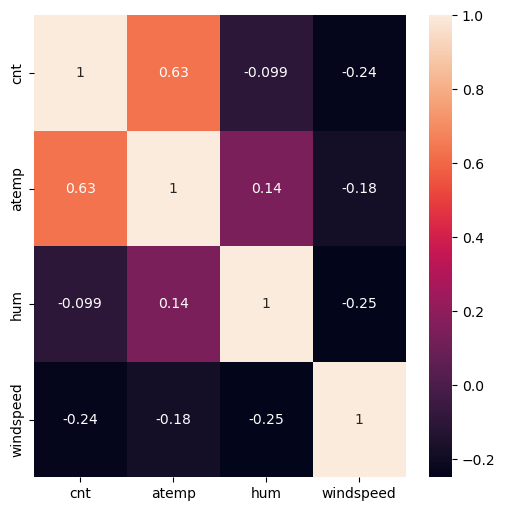

In [13]:
plt.figure(figsize = (6,6))
sns.heatmap(bike_data[['cnt','atemp','hum','windspeed']].corr(),annot=True)

## Observations

1. Outliers are not causing alarming distortion hence no need to remove them.
2. In the year 2019 number of passengers have increased across all categories which indicates the business will do better in years ahead.
3. Fall is most popular season then Summer.
4. Maintenance should be carried out and all bikes should be in perfect condition during Apr-Oct to maximise revenue.
5. On Holidays usage is below mean indicating people spend time with families. However there is not much difference between weekends and weekdays.
6. Clear weather is most preferred.
7. Cnt is correlated to atemp as per the pair plot and heatmap.

## Step 3: Data Preparation (Train-test split, rescaling, etc)

In [14]:
bike_data.head()

,season,yr,month,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,2018,Jan,No Holiday,Sat,Holiday_w,Mist,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,No Holiday,Sun,Holiday_w,Mist,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,No Holiday,Mon,Working,Clear,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,No Holiday,Tue,Working,Clear,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,No Holiday,Wed,Working,Clear,11.46350,43.6957,12.522300,1600


### Dummy Variables

Create Dummy variables for `season`,`yr`,`month`,`holiday`,`weekday`,`workingday` and `weathersit` and drop first column so that there are level-1 columns. We need to convert these levels into integer as well. 

Merge the dummy variables with existing dataframe and drop the original categorical variables.

In [15]:
status=pd.get_dummies(bike_data[['season','yr','month','holiday','weekday','workingday','weathersit']],drop_first=True,dtype=int)
df=pd.concat([bike_data,status],axis=1)
df.drop(['season','yr','month','holiday','weekday','workingday','weathersit'],axis=1,inplace=True)

In [16]:
df_train,df_test=train_test_split(df,train_size=.7,random_state=100)

In [17]:
df_train.head()

,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,month_Aug,month_Dec,...,holiday_No Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Working,weathersit_Light Rain,weathersit_Mist
576,33.1448,70.4167,11.083475,7216,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
426,20.6746,62.1250,10.792293,4066,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
728,11.5850,48.3333,23.500518,1796,1,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,0
482,18.8752,48.9583,8.708325,4220,0,1,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
111,16.0977,72.9583,14.707907,1683,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


### Rescaling the Features 

We will use MinMax scaling. Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

In [18]:
scaler=MinMaxScaler()
num_vars=['atemp','hum','windspeed','cnt']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [19]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### Dividing into X and Y sets for the model building

In [20]:
y_train=df_train.pop('cnt')
X_train=df_train

# Step 4 - Training the model

In [21]:
X_train_const=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_const).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.4
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.07e-179
Time:                        13:47:23   Log-Likelihood:                 523.21
No. Observations:                 510   AIC:                            -990.4
Df Residuals:                     482   BIC:                            -871.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2805      0.052      5.433      0.000       0.179       0.382
atemp                     0.4160      0.045      9.174      0.000       0.327       0.505
hum                      -0.1459      0.039     -3.761      0.000      -0.222      -0.070
windspeed                -0.1683      0.026     -6.488      0.000      -0.219      -0.117
season_spring            -0.0519      0.030     -1.724      0.085      -0.111       0.007
season_summer             0.0348      0.026      1.327      0.185      -0.017       0.086
season_winter             0.1015      0.028      3.612      0.000       0.046       0.157
yr_2019                   0.2344      0.008     28.934      0.000       0.218       0.250
month_Aug                 0.0419      0.033      1.257      0.209      -0.024       0.107
month_Dec                -0.0526      0.034     -1.560      0.120      -0.119       0.014
month_Feb                -0.0404      0.033     -1.221      0.223      -0.105       0.025
month_Jan                -0.0736      0.034     -2.188      0.029      -0.140      -0.007
month_Jul                -0.0147      0.035     -0.424      0.672      -0.083       0.053
month_Jun                 0.0242      0.024      1.000      0.318      -0.023       0.072
month_Mar                -0.0003      0.025     -0.014      0.989      -0.049       0.048
month_May                 0.0363      0.021      1.734      0.084      -0.005       0.077
month_Nov                -0.0457      0.037     -1.249      0.212      -0.118       0.026
month_Oct                 0.0076      0.036      0.210      0.833      -0.063       0.079
month_Sep                 0.0957      0.032      2.984      0.003       0.033       0.159
holiday_No Holiday        0.0437      0.021      2.086      0.037       0.003       0.085
weekday_Mon              -0.0263      0.015     -1.702      0.089      -0.057       0.004
weekday_Sat               0.0313      0.012      2.665      0.008       0.008       0.054
weekday_Sun              -0.0231      0.012     -1.945      0.052      -0.046       0.000
weekday_Thu              -0.0131      0.016     -0.835      0.404      -0.044       0.018
weekday_Tue              -0.0214      0.016     -1.368      0.172      -0.052       0.009
weekday_Wed              -0.0082      0.015     -0.545      0.586      -0.038       0.021
workingday_Working        0.0355      0.010      3.687      0.000       0.017       0.054
weathersit_Light Rain    -0.2530      0.027     -9.497      0.000      -0.305      -0.201
weathersit_Mist          -0.0612      0.010     -5.830      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       85.560   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarqu

In [22]:
### Then Use RFE to get relevant columns

lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,n_features_to_select=14)
rfe=rfe.fit(X_train,y_train)

In [23]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 5),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('month_Aug', True, 1),
 ('month_Dec', False, 3),
 ('month_Feb', False, 2),
 ('month_Jan', True, 1),
 ('month_Jul', False, 9),
 ('month_Jun', False, 7),
 ('month_Mar', False, 15),
 ('month_May', False, 6),
 ('month_Nov', False, 4),
 ('month_Oct', False, 14),
 ('month_Sep', True, 1),
 ('holiday_No Holiday', True, 1),
 ('weekday_Mon', False, 10),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 8),
 ('weekday_Thu', False, 12),
 ('weekday_Tue', False, 11),
 ('weekday_Wed', False, 13),
 ('workingday_Working', True, 1),
 ('weathersit_Light Rain', True, 1),
 ('weathersit_Mist', True, 1)]

In [24]:
col = X_train.columns[rfe.support_]
col

Index(['atemp', 'hum', 'windspeed', 'season_summer', 'season_winter',
       'yr_2019', 'month_Aug', 'month_Jan', 'month_Sep', 'holiday_No Holiday',
       'weekday_Sat', 'workingday_Working', 'weathersit_Light Rain',
       'weathersit_Mist'],
      dtype='object')

In [25]:
X_train.columns[~rfe.support_]

Index(['season_spring', 'month_Dec', 'month_Feb', 'month_Jul', 'month_Jun',
       'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'weekday_Mon',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [26]:
# Create function to calculate the VIFs for the models

def calculate_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [27]:
X_train_new=X_train[col]
calculate_vif(X_train_new)

,Features,VIF
9,holiday_No Holiday,29.06
1,hum,27.24
0,atemp,12.35
11,workingday_Working,5.80
2,windspeed,4.37
13,weathersit_Mist,2.23
10,weekday_Sat,2.11
5,yr_2019,2.07
4,season_winter,2.04
3,season_summer,1.97


In [28]:
# Create the Linear model with reduced variables per RFE
X_train_const=sm.add_constant(X_train_new)
lr1=sm.OLS(y_train,X_train_const).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.52e-188
Time:                        13:47:56   Log-Likelihood:                 510.80
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     495   BIC:                            -928.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1532      0.037      4.093      0.000       0.080       0.227
atemp                     0.5339      0.026     20.535      0.000       0.483       0.585
hum                      -0.1635      0.038     -4.343      0.000      -0.238      -0.090
windspeed                -0.1713      0.026     -6.626      0.000      -0.222      -0.121
season_summer             0.0937      0.011      8.304      0.000       0.072       0.116
season_winter             0.1307      0.012     11.294      0.000       0.108       0.153
yr_2019                   0.2307      0.008     28.435      0.000       0.215       0.247
month_Aug                 0.0636      0.016      3.943      0.000       0.032       0.095
month_Jan                -0.0414      0.018     -2.363      0.019      -0.076      -0.007
month_Sep                 0.1212      0.016      7.481      0.000       0.089       0.153
holiday_No Holiday        0.0532      0.027      1.950      0.052      -0.000       0.107
weekday_Sat               0.0523      0.015      3.549      0.000       0.023       0.081
workingday_Working        0.0437      0.012      3.731      0.000       0.021       0.067
weathersit_Light Rain    -0.2383      0.026     -9.025      0.000      -0.290      -0.186
weathersit_Mist          -0.0569      0.011     -5.414      0.000      -0.078      -0.036
==============================================================================
Omnibus:                       57.139   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.057
Skew:                          -0.560   Prob(JB):                     2.60e-33
Kurtosis:                       5.410   Cond. No.                         24.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF of holiday_No Holiday is high and p-value is also highest in the summary hence drop it

In [29]:
X_train_new.drop(['holiday_No Holiday'],axis=1,inplace=True)
calculate_vif(X_train_new)

,Features,VIF
1,hum,19.69
0,atemp,11.71
10,workingday_Working,4.59
2,windspeed,3.77
12,weathersit_Mist,2.15
5,yr_2019,2.04
4,season_winter,2.02
3,season_summer,1.97
9,weekday_Sat,1.81
6,month_Aug,1.56


In [30]:
X_train_const=sm.add_constant(X_train_new)
lr2=sm.OLS(y_train,X_train_const).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.8
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          6.87e-189
Time:                        13:48:28   Log-Likelihood:                 508.85
No. Observations:                 510   AIC:                            -989.7
Df Residuals:                     496   BIC:                            -930.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1971      0.030      6.574      0.000       0.138       0.256
atemp                     0.5357      0.026     20.558      0.000       0.484       0.587
hum                      -0.1625      0.038     -4.304      0.000      -0.237      -0.088
windspeed                -0.1720      0.026     -6.634      0.000      -0.223      -0.121
season_summer             0.0942      0.011      8.326      0.000       0.072       0.116
season_winter             0.1303      0.012     11.225      0.000       0.107       0.153
yr_2019                   0.2309      0.008     28.375      0.000       0.215       0.247
month_Aug                 0.0638      0.016      3.943      0.000       0.032       0.096
month_Jan                -0.0419      0.018     -2.386      0.017      -0.076      -0.007
month_Sep                 0.1193      0.016      7.356      0.000       0.087       0.151
weekday_Sat               0.0604      0.014      4.250      0.000       0.032       0.088
workingday_Working        0.0516      0.011      4.683      0.000       0.030       0.073
weathersit_Light Rain    -0.2374      0.026     -8.966      0.000      -0.289      -0.185
weathersit_Mist          -0.0566      0.011     -5.370      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       62.768   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.141
Skew:                          -0.600   Prob(JB):                     2.53e-38
Kurtosis:                       5.590   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF of hum is high hence dropping it.


In [31]:
X_train_new.drop(['hum'],axis=1,inplace=True)
calculate_vif(X_train_new)

,Features,VIF
0,atemp,6.22
9,workingday_Working,4.31
1,windspeed,3.56
4,yr_2019,2.04
2,season_summer,1.93
8,weekday_Sat,1.76
3,season_winter,1.60
11,weathersit_Mist,1.57
5,month_Aug,1.56
7,month_Sep,1.31


In [32]:
X_train_const=sm.add_constant(X_train_new)
lr3=sm.OLS(y_train,X_train_const).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.7
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          3.96e-186
Time:                        13:48:58   Log-Likelihood:                 499.50
No. Observations:                 510   AIC:                            -973.0
Df Residuals:                     497   BIC:                            -918.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1057      0.022      4.908      0.000       0.063       0.148
atemp                     0.5097      0.026     19.763      0.000       0.459       0.560
windspeed                -0.1431      0.025     -5.616      0.000      -0.193      -0.093
season_summer             0.0907      0.011      7.901      0.000       0.068       0.113
season_winter             0.1198      0.012     10.378      0.000       0.097       0.143
yr_2019                   0.2347      0.008     28.519      0.000       0.219       0.251
month_Aug                 0.0618      0.016      3.755      0.000       0.029       0.094
month_Jan                -0.0479      0.018     -2.688      0.007      -0.083      -0.013
month_Sep                 0.1132      0.016      6.886      0.000       0.081       0.145
weekday_Sat               0.0651      0.014      4.521      0.000       0.037       0.093
workingday_Working        0.0544      0.011      4.867      0.000       0.032       0.076
weathersit_Light Rain    -0.2824      0.025    -11.406      0.000      -0.331      -0.234
weathersit_Mist          -0.0825      0.009     -9.375      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       60.999   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.693
Skew:                          -0.602   Prob(JB):                     3.47e-35
Kurtosis:                       5.453   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF of "atemp" is high but as per visualization it is correlated to cnt. 
Morover checked if we drop ""workingday_Working" instead then R squared of model is higher and Prob (F-statistic) is closer to 0. Further, the max VIF falls below 5 which is acceptable. Hence drop "workingday_Working"

In [33]:
X_train_new.drop(['workingday_Working'],axis=1,inplace=True)
calculate_vif(X_train_new)

,Features,VIF
0,atemp,4.97
1,windspeed,3.31
4,yr_2019,2.04
2,season_summer,1.91
3,season_winter,1.56
5,month_Aug,1.56
10,weathersit_Mist,1.54
7,month_Sep,1.31
6,month_Jan,1.22
8,weekday_Sat,1.18


In [34]:
X_train_const=sm.add_constant(X_train_new)
lr4=sm.OLS(y_train,X_train_const).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.8
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.65e-182
Time:                        13:49:37   Log-Likelihood:                 487.63
No. Observations:                 510   AIC:                            -951.3
Df Residuals:                     498   BIC:                            -900.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1469      0.020      7.256      0.000       0.107       0.187
atemp                     0.5116      0.026     19.404      0.000       0.460       0.563
windspeed                -0.1449      0.026     -5.562      0.000      -0.196      -0.094
season_summer             0.0927      0.012      7.898      0.000       0.070       0.116
season_winter             0.1178      0.012      9.984      0.000       0.095       0.141
yr_2019                   0.2352      0.008     27.948      0.000       0.219       0.252
month_Aug                 0.0654      0.017      3.888      0.000       0.032       0.098
month_Jan                -0.0476      0.018     -2.614      0.009      -0.083      -0.012
month_Sep                 0.1146      0.017      6.822      0.000       0.082       0.148
weekday_Sat               0.0216      0.012      1.873      0.062      -0.001       0.044
weathersit_Light Rain    -0.2747      0.025    -10.872      0.000      -0.324      -0.225
weathersit_Mist          -0.0796      0.009     -8.866      0.000      -0.097      -0.062
==============================================================================
Omnibus:                       66.713   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.638
Skew:                          -0.683   Prob(JB):                     1.31e-35
Kurtosis:                       5.386   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Step 5: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [35]:
y_train_pred=lr4.predict()

res=y_train-y_train_pred

Text(0.5, 0, 'Errors')

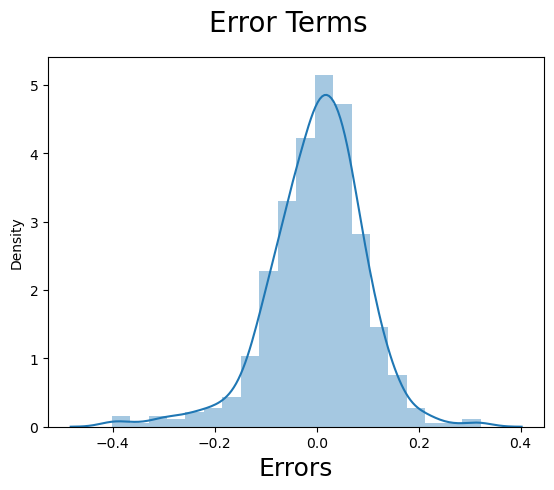

In [36]:
# Plot the histogram of the error terms which shows normal distribution
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [37]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.8279076097925593

# Step 6: Making Predictions and Evaluation on test data

### Apply scaling on test set

In [38]:
num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.describe()

,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,month_Aug,month_Dec,...,holiday_No Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Working,weathersit_Light Rain,weathersit_Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.481818,0.059091,0.086364,...,0.963636,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.700000,0.027273,0.318182
std,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.500809,0.236333,0.281541,...,0.187620,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.459303,0.163248,0.466833
min,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
y_test=df_test.pop('cnt')

In [40]:
X_test=df_test

In [41]:
X_test_new=X_test[X_train_new.columns]
X_test_const=sm.add_constant(X_test_new)

In [42]:
y_test_pred=lr4.predict(X_test_const)

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7906630410553935

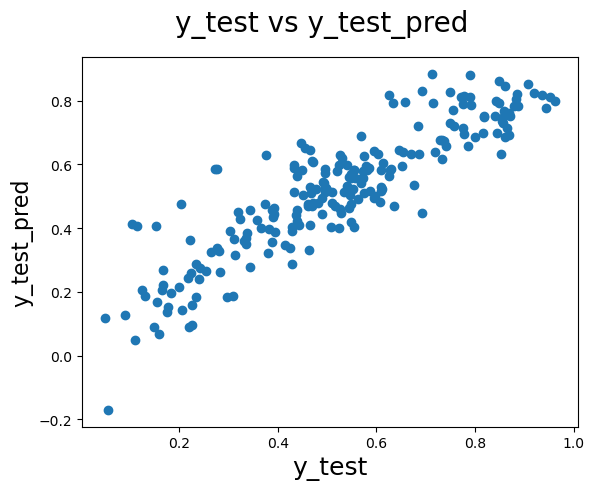

In [44]:
# Plotting y_test and y_pred confirms linear relation between test and predicted values of y which confirms efficacy of the model.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

In [45]:
lr4.params

const                    0.146943
atemp                    0.511635
windspeed               -0.144919
season_summer            0.092692
season_winter            0.117796
yr_2019                  0.235150
month_Aug                0.065359
month_Jan               -0.047622
month_Sep                0.114610
weekday_Sat              0.021636
weathersit_Light Rain   -0.274668
weathersit_Mist         -0.079622
dtype: float64

The equation for target variable - 
cnt=0.146943 + 0.511635*atemp -0.144919*windspeed + 0.092692*season_summer + 0.117796*season_winter + 0.235150*yr_2019 + 0.065359*month_Aug -0.047622*month_Jan + 0.11461*month_Sep + 0.021636*weekday_Sat -0.274668*weathersit_Light Rain -0.079622* weathersit_Mist

Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.828
- Test dataset R^2           : 0.79